In [1]:
import import_ipynb
import pandas as pd
from IPython.display import display
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt  # To visualize
from matplotlib import dates as mdate
from BabiloniaDataAnalytics import BabiloniaDataAnalytics
bda = BabiloniaDataAnalytics('../../server/app/config.json')
ONE_HOUR=120

importing Jupyter notebook from BabiloniaDataAnalytics.ipynb


In [2]:
bda.plot_node_moisture()
# Range: 1608951600 – 1609037999 => 26/12/2020 (entire day)

In [164]:
signal = bda.NODE_MOISTURE_DATA[(bda.NODE_MOISTURE_DATA.index > 1608951600) & (bda.NODE_MOISTURE_DATA.index < 1609037999)].rolling(60).mean().dropna()


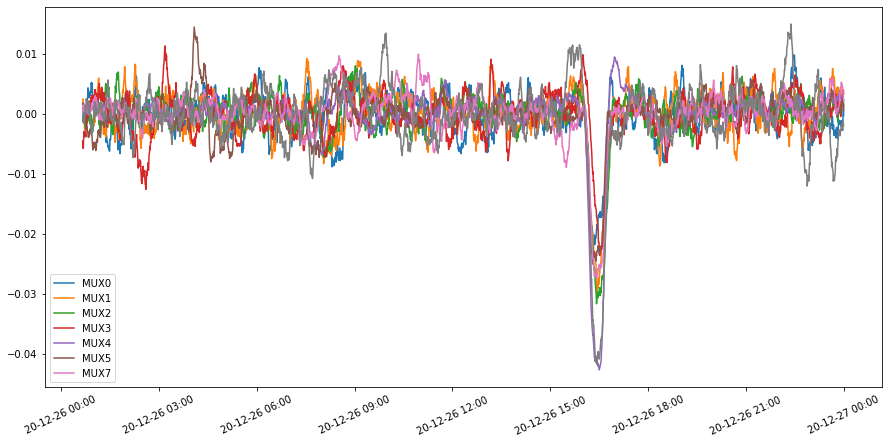

In [168]:
dd= signal.pct_change(periods=20).dropna()

plt.rcParams['figure.figsize'] = [15,7]
plt.rcParams['timezone'] = 'America/Sao_Paulo'

fig,ax = plt.subplots()
x = mdate.epoch2num(dd.index)
fmt = mdate.DateFormatter('%y-%m-%d %H:%M')

ax.xaxis.set_major_formatter(fmt)
plt.xticks( rotation=25 )
plt.plot_date(x, dd, linestyle='solid', marker='None')
muxes = ['MUX0','MUX1','MUX2','MUX3','MUX4','MUX5','MUX7']
plt.legend(muxes)
plt.show()

In [167]:
for mux in muxes:
    min_idx = dd[mux].idxmin()
    min_value = dd[mux][min_idx]
    max_idx = dd[mux].idxmax()
    max_value = dd[mux][max_idx]
    print (mux, " >> min_idx: ", min_idx, " min_value:", min_value)
    #print (mux, " >> max_idx: ", max_idx, " max_value:", max_value)

MUX0  >> min_idx:  1609010070  min_value: -0.012397770484971482
MUX1  >> min_idx:  1609010760  min_value: -0.01641000962463912
MUX2  >> min_idx:  1609010700  min_value: -0.017612312361133697
MUX3  >> min_idx:  1609011060  min_value: -0.012589843566496062
MUX4  >> min_idx:  1609010910  min_value: -0.021770181746539996
MUX5  >> min_idx:  1609010340  min_value: -0.013616454008760215
MUX7  >> min_idx:  1609010460  min_value: -0.02246407891915081
